In [63]:
!wget --no-check-certificate \
  https://firebasestorage.googleapis.com/v0/b/writehere-13.appspot.com/o/Consumer_Complaints.csv?alt=media&token=06497397-7e47-4919-8a81-8bb8a5ee3268

/bin/bash: -O: command not found
--2020-08-24 10:07:10--  https://firebasestorage.googleapis.com/v0/b/writehere-13.appspot.com/o/Consumer_Complaints.csv?alt=media
Resolving firebasestorage.googleapis.com (firebasestorage.googleapis.com)... 173.194.217.95, 2607:f8b0:400c:c15::5f
Connecting to firebasestorage.googleapis.com (firebasestorage.googleapis.com)|173.194.217.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255633355 (244M) [text/csv]
Saving to: ‘Consumer_Complaints.csv?alt=media’

Consumer_Complaints 100%[===================>] 243.79M   183MB/s    in 1.3s    

2020-08-24 10:07:11 (183 MB/s) - ‘Consumer_Complaints.csv?alt=media’ saved [255633355/255633355]



In [64]:
import pandas as pd
df = pd.read_csv('Consumer_Complaints.csv?alt=media')
df.drop(df.index[2500:670593], inplace=True)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/29/2013,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,Wells Fargo & Company,VA,24540,NaN,NaN,Phone,07/30/2013,Closed with explanation,Yes,No,468882
1,07/29/2013,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,Older American,NaN,Web,07/31/2013,Closed with explanation,Yes,No,468889
2,07/29/2013,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,Santander Bank US,NY,10065,NaN,NaN,Fax,07/31/2013,Closed,Yes,No,468879
3,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,GA,30084,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468949
4,07/29/2013,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Franklin Credit Management,CT,06106,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,475823


In [65]:
Product = pd.get_dummies(df.Product)
df_baru = pd.concat([df, Product], axis=1)
df_baru = df_baru.drop(columns=[
          'Date received', 'Product', 'Sub-product', 'Sub-issue','Consumer complaint narrative',
          'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Timely response?',
          'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer',
          'Timely response?', 'Consumer disputed?', 'Complaint ID'
        ])
df_baru

,Issue,Bank account or service,Consumer Loan,Credit card,Credit reporting,Debt collection,Money transfers,Mortgage,Student loan
0,Managing the loan or lease,0,1,0,0,0,0,0,0
1,Using a debit or ATM card,1,0,0,0,0,0,0,0
2,"Account opening, closing, or management",1,0,0,0,0,0,0,0
3,Deposits and withdrawals,1,0,0,0,0,0,0,0
4,"Loan servicing, payments, escrow account",0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
670593,Incorrect information on credit report,0,0,0,1,0,0,0,0
670594,"Loan modification,collection,foreclosure",0,0,0,0,0,0,1,0
670595,Incorrect information on credit report,0,0,0,1,0,0,0,0
670596,Closing/Cancelling account,0,0,1,0,0,0,0,0


In [66]:
news = df_baru['Issue'].values
label = df_baru[[
            'Bank account or service', 'Consumer Loan', 'Credit card', 'Credit reporting',
            'Debt collection', 'Money transfers', 'Mortgage', 'Student loan']].values


In [67]:
from sklearn.model_selection import train_test_split
news_train, news_test, label_train, label_test = train_test_split(news, label, test_size=0.2)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(news_train) 
tokenizer.fit_on_texts(news_test)
 
sekuens_latih = tokenizer.texts_to_sequences(news_train)
sekuens_test = tokenizer.texts_to_sequences(news_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)


In [68]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [69]:
class customCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      print("\nAkurasi pada training set dan validation set telah mencapai >90%!")
      self.model.stop_training = True
callbacks = customCallback()

In [70]:
num_epochs = 50
history = model.fit(padded_latih, label_train, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/50
63/63 - 1s - loss: 1.6281 - accuracy: 0.4471 - val_loss: 1.0883 - val_accuracy: 0.6507
Epoch 2/50
63/63 - 0s - loss: 0.8408 - accuracy: 0.7335 - val_loss: 0.4153 - val_accuracy: 0.9242
Epoch 3/50
63/63 - 0s - loss: 0.3861 - accuracy: 0.9047 - val_loss: 0.1507 - val_accuracy: 0.9561
Epoch 4/50
63/63 - 0s - loss: 0.1952 - accuracy: 0.9386 - val_loss: 0.0878 - val_accuracy: 0.9701
Epoch 5/50
63/63 - 0s - loss: 0.1428 - accuracy: 0.9621 - val_loss: 0.0647 - val_accuracy: 0.9840
Epoch 6/50
63/63 - 0s - loss: 0.1079 - accuracy: 0.9741 - val_loss: 0.0416 - val_accuracy: 0.9920
Epoch 7/50
63/63 - 0s - loss: 0.0819 - accuracy: 0.9760 - val_loss: 0.0597 - val_accuracy: 0.9920
Epoch 8/50
63/63 - 0s - loss: 0.0748 - accuracy: 0.9775 - val_loss: 0.0326 - val_accuracy: 0.9920
Epoch 9/50
63/63 - 0s - loss: 0.0592 - accuracy: 0.9815 - val_loss: 0.0218 - val_accuracy: 0.9920
Epoch 10/50
63/63 - 0s - loss: 0.0506 - accuracy: 0.9820 - val_loss: 0.0202 - val_accuracy: 0.9920
Epoch 11/50
63/63 -

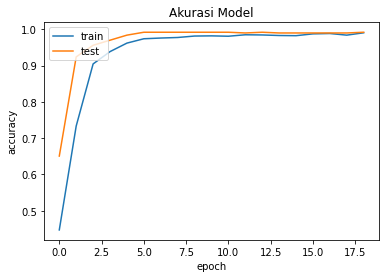

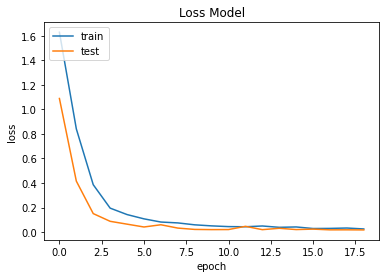

In [71]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()